# <center><font color=&ldquo;orange&rdquo;> O caxeiro viajante com gasolina infinita & sem consciência ambiental

<hr>

Por conta de disponibilidade de tempo e organização própria, resolvi resolver rapidamente um experimento para já ter dois prontos. Os demais aqui na pasta serão desenvolvidos quando possível.

## <font color=&ldquo;orange&rdquo;>INTRODUÇÃO



**ENUNCIADO**



> <div style=' text-align: justify; text-justify: inter-word;'> Considere um número $n\geq 7$ de coordenadas $(x,y)$ de cidades e que o caixeiro tenha combustível infinito. Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade mais de uma vez.


<br>

**DISCUSSÃO**
<div style=' text-align: justify; text-justify: inter-word;'>No experimento A.06, nós retomamos o problema do caixeiro viajante que já nos havia sido apresentado em disciplinas anteriores. Contudo, caso você não o conheça, vamos entendê-lo aqui brevemente: o caxeiro viajante, como o próprio nome diz, é um viajante que passa por inúmeras cidades. Contudo, o objetivo dele é voltar para a mesma cidade de início (da qual ele partiu), fazendo o menor caminho de todos e passando por todas as cidades. O problema original se trata de um problema de minimização. Aqui, porém, temos um trabalho de maximização, então precisaremos alterar algumas de nossas funções.

## <font color=&ldquo;orange&rdquo;>OBJETIVOS



1. Encontrar o caminho de *maior* distância no problema do caixeiro viajante;
2. Mostrar esse caminho de forma gráfica;
3. Entender como alterar um código que já conhecemos para alterar o objetivo do problema.



> <hr>

## <font color=&ldquo;orange&rdquo;>IMPORTAÇÕES



Importando a biblioteca `random` para conseguirmos gerar elementos aleatórios (as coordenadas). 


In [1]:
import random

<div style=' text-align: justify; text-justify: inter-word;'>
    
Importando a biblioteca `matplotlib` para conseguir gerar o grafo que representará o caminho do nosso caixeiro. Além disso, estamos importando `networkx`, biblioteca que é especializada em grafos.

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

> <hr>

## <font color=&ldquo;orange&rdquo;>CÓDIGOS E DISCUSSÃO



<div style=' text-align: justify; text-justify: inter-word;'> Algumas das funções aqui foram desenvolvidas em outros notebooks presentes no repositório e que você pode acessar. A função `selecao_torneio_max` por exemplo, é uma variação da `selecao_torneio_min` desenvolvida para resolver a atividade do notebook A.05 do Problema das Senhas (30/03) e registrada no arquivo 'funcoes.py'. As demais podem ser encontradas no arquivo 'funcoes.py' na divisório referente ao experimento A.06: O caixeiro viajante (06/04). 
    <br> Resolvi anexar todas as funções aqui para poder discutir elas no decorrer da atividade, mas elas também podem ser encontradasno arquivo 'cvgisca_funcoes.py', escrito especialmente para essa atividade.

> **POPULAÇÃO E INDIVÍDUOS**

<div style=' text-align: justify; text-justify: inter-word;'>
    As funções nessa região são as responsáveis pela criação dos indivíduos que compõem uma população e da população em si. Elas fornecem as informações necessárias para a constituição da população inicial, a partir da qual as próximas populações serão criadas. No problema em questão, os indivíduos correspondem a caminhos compostos pelas cidades que foram criadas. Uma população, por sua vez, corresponde ao conjunto de diferentes opções de caminho.

In [14]:
def distancia_entre_dois_pontos(a, b):
    """Computa a distância Euclidiana entre dois pontos em R^2
    Args:
      a: lista contendo as coordenadas x e y de um ponto.
      b: lista contendo as coordenadas x e y de um ponto.
    Returns:
      Distância entre as coordenadas dos pontos `a` e `b`.
    """

    x1 = a[0]
    x2 = b[0]
    y1 = a[1]
    y2 = b[1]

    dist = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)

    return dist


def cria_cidades(n): # criamos diferentes opções de cidade para quais o caixeiro pode viajar
    """Cria um dicionário aleatório de cidades com suas posições (x,y).
    Args:
      n: inteiro positivo definido nas constantes. Para esse problema, posso dizer que estamos trabalhando com 7.
        Número de cidades que serão visitadas pelo caixeiro.
    Returns:
      Dicionário contendo o nome das cidades como chaves e a coordenada no plano cartesiano das cidades como valores.
    """

    cidades = {} # dicionário
                    # a informação de que se trata de um dicionário será importante no momento da elaboração dos grafos

    for i in range(n):
        cidades[f"Cidade {i}"] = (random.random(), random.random()) # tupla: imutável: cidades não saem do lugar # não cabe alterações

    return cidades

def individuo_cv(cidades):
    """Sorteia um caminho possível no problema do caixeiro viajante
    Args:
      cidades:
        Dicionário onde as chaves são os nomes das cidades e os valores são as coordenadas das cidades.
    Return:
      Retorna uma lista de nomes de cidades formando um caminho onde visitamos cada cidade apenas uma vez.
    """
    nomes = list(cidades.keys()) # o método 'keys()' reotorna 'a view object', esse objeto contém as chaves do dicionário
    random.shuffle(nomes) # embaralha todos os nomes das cidades para criar novas possibilidades
    return nomes 

def populacao_inicial_cv(tamanho, cidades): # a ideia geral de população não muda
    """Cria população inicial no problema do caixeiro viajante.
    Args
      tamanho:
        Tamanho da população.
      cidades:
        Dicionário onde as chaves são os nomes das cidades e os valores são as
        coordenadas das cidades.
    Returns:
      Lista com todos os indivíduos da população no problema do caixeiro
      viajante.
    """
    populacao = []
    for _ in range(tamanho): #range do tamanho da população
        populacao.append(individuo_cv(cidades)) # add na lista o indivíduo gerado
    return populacao

<div style=' text-align: justify; text-justify: inter-word;'>
Depois da estruturação de uma população, é necessário selecionar quais indivíduos que a compõem que serão responsáveis por formar as novas gerações. Uma seleção pode ser realizada de inúmeras formas, mas aqui escolhemos o torneio. Além disso, foi necessário estruturar esse sorteio para que ele escolhesse os indivíduos com os maiores fitness possíveis, já que se trata de um problema de maximização.

As principais alterações em relação ao código já conhecido foram:
1. Definição do maior_fitness como '- float("inf")', já que todo número é maior do que menos infinito;
2. Inversão de '<' para '>', indicando que o fit precisa ser maior que o 'maior_fitness'.

In [15]:
def selecao_torneio_max(populacao, fitness, tamanho_torneio=3):
    """Faz a seleção de uma população usando torneio.
    Nota: a implementação aqui vai diferir da implementação encontrada no arquivo 'funcoes.py', pois utilizaremos ele para minimização.
    Args:
      populacao: população do problema
      fitness: lista com os valores de fitness dos individuos 
      tamanho_torneio: quantidade de invidiuos que batalham entre si
    Returns:
      Individuos selecionados. Lista com os individuos selecionados com mesmo tamanho do argumento `populacao`.
    """
    selecionados = [] # tem os individuos que foram selecionados com maior fitness a cada combate (prob. de maximização)

    # criamos essa variável para associar cada individuo com seu valor de fitness
    par_populacao_fitness = list(zip(populacao, fitness)) # zip navega duas listas de ponto a ponto
    # cada item é um par, sendo o primeiro item o indivíduo e o segundo item o fitness desse indivíduo

    # vamos fazer len(populacao) torneios! Que comecem os jogos!
    for _ in range(len(populacao)): # for roda o número de vezes da população 
        combatentes = random.sample(par_populacao_fitness, tamanho_torneio) 

        maior_fitness = - float("inf")

        for par_individuo_fitness in combatentes:
            individuo = par_individuo_fitness[0]
            fit = par_individuo_fitness[1]

            # queremos o individuo de maior fitness
            if fit > maior_fitness: 
                selecionado = individuo # passamos por todos os combatentes e pegamos o com maior fitness
                maior_fitness = fit

        selecionados.append(selecionado)

    return selecionados # ninguém morre, só não é selecionado
                        # um individuo pode ser selecionado mais de uma vez 
                        # isso não é um problema pq 1) já sabemos que ele é bom 2) haverá cruzamento 3) haverá mutação

<div style=' text-align: justify; text-justify: inter-word;'>
O cruzamento também pode ser feito de diferentes maneiras, depende da escolha do programador e do problema trabalhado. Foi escolhido para resolver esse exercício do cruzamento ordenado, no qual o filho terá genes tanto do pai quanto da mãe. Cortes são realizados nos genes (genes são as cidades) e um novo indivíduo é montado a partir desses cortes.

In [16]:
def cruzamento_ordenado(pai, mae):
    """Operador de cruzamento ordenado.
    Neste cruzamento, os filhos mantém os mesmos genes que seus pais tinham,
    porém em uma outra ordem. Trata-se de um tipo de cruzamento útil para
    problemas onde a ordem dos genes é importante e não podemos alterar os genes
    em si. É um cruzamento que pode ser usado no problema do caixeiro viajante.
    Ver pág. 37 do livro do Wirsansky.
    
    Args:
      pai: uma lista representando um individuo
      mae : uma lista representando um individuo
    Returns:
      Duas listas, sendo que cada uma representa um filho dos pais que foram os
      argumentos. Estas listas mantém os genes originais dos pais, porém altera
      a ordem deles.
    """
    
    corte1 = random.randint(0, len(pai) -2) # garantimos que ele nunca vai chegar no final
    corte2 = random.randint(corte1 + 1, len(pai) -1) # se fazemos o corte 2 com base no 1, garantimos que ele não vai chegar no final também
    
    filho1 = pai[corte1:corte2] # cortes definindo a construção do filho # começa pelo pai
    for gene in mae: # precisamos considerar a mãe também
        if gene not in filho1:
            filho1.append(gene)
            
    filho2 = pai[corte1:corte2] # cortes definindo a construção do filho # começa pelo pai
    for gene in pai: # precisamos considerar a mãe também
        if gene not in filho2:
            filho2.append(gene)
             
    return filho1, filho2

<div style=' text-align: justify; text-justify: inter-word;'>
    Mais um dos passos necessários para encontrar o resultado desejado. Após criar a população incial, selecionar os indivíduos que seriam os pais e as mães, criar os novos indivíduos, também faz parte do desenvolvimento de algoritmos genéticos estabelecer a possibilidade de os indivíduos sofrerem mutação. Aqui, a mutação consiste em escolher dois genes que compõem o indivíduo e trocá-los de posição.

In [17]:
def mutacao_de_troca(individuo):
    """Troca o valor de dois genes.
    
    Args:
      Indivíduo: uma lista representado um individuo.
    Return:
      O indivíduo recebido como argumento, porém com dois dos seus genes trocados de posição.
    """
    
    # primeiro passo: selecionar dois individuos
    indices =list(range(len(individuo))) # vamos sortear a posição de genes dentro dos individuos 
    lista_sorteada = random.sample(indices, k = 2) # sorteamos dois índices 
    
    indice1 = lista_sorteada[0]
    indice2 = lista_sorteada[1]
    
    individuo[indice1], individuo[indice2] = individuo[indice2], individuo[indice1]
    
    return individuo  

Escrita das funções responsáveis pelos cálculos dos fitness, valores que, de maneira simples, permitem que comparemos os indivíduos em busca do melhor.

In [18]:
def funcao_objetivo_cv(individuo, cidades):
    """Computa a funcao objetivo de um individuo no problema do caixeiro viajante.
    
    Args:
      individiuo:
        Lista contendo a ordem das cidades que serão visitadas
      cidades:
        Dicionário onde as chaves são os nomes das cidades e os valores são as coordenadas das cidades.
    Returns:
      A distância percorrida pelo caixeiro seguindo o caminho contido no `individuo`. Lembrando que após percorrer todas as cidades em ordem, o
      caixeiro retorna para a cidade original de onde começou sua viagem.
    """

    distancia = 0
    
    for posicao in range(len(individuo) - 1):
                         
        partida = cidades[individuo[posicao]]
        chegada = cidades[individuo[posicao + 1]]
                         
        percurso = distancia_entre_dois_pontos(partida, chegada)
        distancia = distancia + percurso
                         
    # calculando o caminho de volta para a cidade inicial
    partida = cidades[individuo[-1]]
    chegada = cidades[individuo[0]]
                         
    percurso = distancia_entre_dois_pontos(partida, chegada)
    distancia = distancia + percurso
                         
    return distancia


def funcao_objetivo_pop_cv(populacao, cidades):
    """Computa a funcao objetivo de uma população no problema do caixeiro viajante.
    
    Args:
      populacao:
        Lista com todos os indivíduos da população
      cidades:
        Dicionário onde as chaves são os nomes das cidades e os valores são as coordenadas das cidades.
    Returns:
      Lista contendo a distância percorrida pelo caixeiro para todos os indivíduos da população.
    """

    resultado = []
    for individuo in populacao:
        resultado.append(funcao_objetivo_cv(individuo, cidades))

    return resultado

Defnindo algumas funções locais, são chamadas assim porque são úteis somente no contexto desse execício (e no de outro de caixeiro viajante também).

In [19]:
# funções locais
# pensadas para esse problema em específico, não serão encontradas em arquivos de funções
# podem ser funções parciais, ou seja, funções que apenas chamam outras funções

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

Definição das constantes para a resolução do problema.

In [20]:
# CONSTANTES 
# interessante escrever as constantes com letra miúscula, permite diferenciá-las dentro da função 

# relacionadas à busca 
## podem ser alteradas
TAMANHO_POP = 25 # número total de indivíduos na população 
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3 # utilizando torneio para selecionar indivíduos, minimização = menor fitness passa

# relacionadas ao problema a ser resolvido
## não podem ser alteradas
NUMERO_DE_CIDADES = 7 # mudando para o número do bts já que a coreia está em festa
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

Complementando o código, para além das funções em si, alguns outros aspectos também precisam ser definidos.

In [21]:
# Busca por algoritmo genético

populacao = populacao_inicial_cv(TAMANHO_POP, CIDADES) 
# criação consiste no agrupamento de todos os indivíduos = n° máx dado pela constante TAMANHO_POP definida anteriormente
# cada indivíduo, por sua vez, é formado por um número definido de genes (sendo as cidades as correspondentes aos genes)

melhor_fitness_ja_visto = - float("inf")  # 'inf' é a notação de infinito
                                        # usamos '- inf' porque qualquer número é maior do que menos infinito
                                        # float permite que o melhor fitness possa ser um número qualquer, incluindo decimais

# critério de parada, precisamos testar todas as opções, então precisamos passar por todas as gerações
for n in range(NUM_GERACOES): # para cada geração dentro do número total de gerações
    
    # seleção (primeira parte, escolhendo os pais e mães)
    fitness = funcao_objetivo_pop(populacao) # calculo do fitness para todos os indivíduos da população
    populacao = selecao_torneio_max(populacao, fitness) # montagem da população de acordo com os indivíduos selecionados
    
    # segunda parte, cruzamento
    # novamente, dentro da população inteira, alternaremos os indivíduos entre pai e mãe
    # quer dizer que, se o pai for o elemento na posição 0, a mãe será 1, o próximo pai 2 e assim em diante, até o último indiv.
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0 # contador é uma subclasse de dicionários
    
    for pai, mae in zip(pais, maes): # mexe-se simultaneamente nas listas de 'pais' e 'maes'
        if random.random() <= CHANCE_CRUZAMENTO: 
            filho1, filho2 = cruzamento_ordenado(pai, mae) # lembrando que, aqui, o cruzamento é feito a partir de dois cortes
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    # a mutação aqui, esolhe dois genes e troca eles entre si
    # exemplo: se a ordem era [a, b, c, d, e] e ele escolher 'c' e 'd', a ordem passará a ser [a, b, d, c, e]
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n] #individuos como elementos posicionados na lista de populacao
            populacao[n] = mutacao_de_troca(individuo) # o individuo selecionado aleatoriamente é submetido à mutação        
            
    # melhor individuo já visto até agora
    # garantimos que o melhor fitness vai sendo atualizado conforme novas análises
    # nnosso melhor fitness agora é positivo, foi mudamos o torneio de seleção
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:       
        posicao = fitness.index(maior_fitness) # index retorna a posição
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness 
        
    print(populacao[0])

['Cidade 2', 'Cidade 3', 'Cidade 0', 'Cidade 5', 'Cidade 4', 'Cidade 1', 'Cidade 6']
['Cidade 6', 'Cidade 3', 'Cidade 2', 'Cidade 4', 'Cidade 1', 'Cidade 0', 'Cidade 5']
['Cidade 3', 'Cidade 2', 'Cidade 0', 'Cidade 1', 'Cidade 4', 'Cidade 6', 'Cidade 5']
['Cidade 6', 'Cidade 3', 'Cidade 1', 'Cidade 4', 'Cidade 2', 'Cidade 0', 'Cidade 5']
['Cidade 2', 'Cidade 3', 'Cidade 0', 'Cidade 5', 'Cidade 4', 'Cidade 1', 'Cidade 6']
['Cidade 4', 'Cidade 3', 'Cidade 0', 'Cidade 5', 'Cidade 1', 'Cidade 6', 'Cidade 2']
['Cidade 4', 'Cidade 5', 'Cidade 1', 'Cidade 0', 'Cidade 3', 'Cidade 2', 'Cidade 6']
['Cidade 2', 'Cidade 3', 'Cidade 0', 'Cidade 5', 'Cidade 4', 'Cidade 1', 'Cidade 6']
['Cidade 2', 'Cidade 3', 'Cidade 0', 'Cidade 5', 'Cidade 4', 'Cidade 1', 'Cidade 6']
['Cidade 2', 'Cidade 3', 'Cidade 0', 'Cidade 5', 'Cidade 4', 'Cidade 1', 'Cidade 6']
['Cidade 1', 'Cidade 4', 'Cidade 0', 'Cidade 3', 'Cidade 2', 'Cidade 5', 'Cidade 6']
['Cidade 1', 'Cidade 6', 'Cidade 4', 'Cidade 5', 'Cidade 3', 'Cid

In [22]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 5', 'Cidade 1', 'Cidade 3', 'Cidade 0', 'Cidade 4', 'Cidade 6', 'Cidade 2'] com distância: 5.049507555520859


> **PLOTANDO O GRAFO DO RESULTADO**

A função `cria_cidades` cria um dicionário de cidades, logo, aqui precisamos ser capazes de acessar os seus elementos.

In [23]:
# dicionário que contém as informações referentes às cidades
CIDADES

{'Cidade 0': (0.8157720054911566, 0.9077969974235555),
 'Cidade 1': (0.050736480446396226, 0.6960333111146457),
 'Cidade 2': (0.165947788511291, 0.3533612415014794),
 'Cidade 3': (0.7996638669817834, 0.2444673715990181),
 'Cidade 4': (0.6636768286696357, 0.03910630824304928),
 'Cidade 5': (0.6556705461552462, 0.4070793493941217),
 'Cidade 6': (0.9559906148510594, 0.32515954869474906)}

<br>
Precisamos fazer o nosso grafo com os dados contidos no dicionário. Cada um dos nós corresponderá a uma cidade. Logo, para cada cidade em CIDADES, precisamos de um nó.

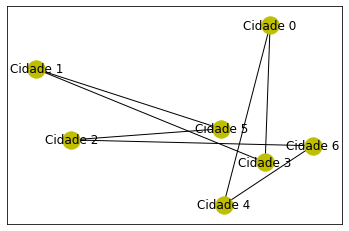

In [24]:
# Cria um objeto de grafo vazio
caminho_caixeiro = nx.Graph()

# add alguns nós/vértices no gráfico 
for c in list(CIDADES.keys()): # apara cada cidade no dicionário
    caminho_caixeiro.add_node(c) # adicionar o nó c

# criando os edge (ligando os caminhos)
k = -1
while k < len(melhor_individuo_ja_visto)-1: # menos 1 aqui permite que você vá até o último
                                            # enquanto o valor de k for menor que o número de elementos em melhor_individuo_ja_visto
    caminho_caixeiro.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1])
    k+=1

#nx.draw_networkx(caminho_caixeiro, node_color 
vertices = CIDADES.keys()
pos = nx.spring_layout(caminho_caixeiro, pos = CIDADES, fixed = vertices)
nx.draw_networkx(caminho_caixeiro, pos, node_color = 'y')

Apesar de ter dado errado várias vezes, agora conseguimos visualizar também o problema do caixeiro viajante com gasolina infinita.

> <hr>

## <font color=&ldquo;orange&rdquo;> CONCLUSÃO



<div style=' text-align: justify; text-justify: inter-word;'>
Encaramos agora o exercício do caixeiro viajante por uma nova perspectiva, um problema que já havíamos visto mais de uma vez como um problema de minimização se tornando um problema de maximização somente com a alteração da condição de que deseja-se o caminho mais longo agora. Algumas alterações básicas foram feitas no código e foram indicadas ao longo do notebook, contudo, apesar da simplicidade, elas são fundamentais para que o código faça o que pedimos. Simples, mas possuem um grande impacto.


<hr>

## <font color=&ldquo;orange&rdquo;>REFERÊNCIAS



1. CARVALHO, Marco Antonio M. Teoria dos Grafos. UFOP, 2019. Disponível em: <http://www.decom.ufop.br/marco/site_media/uploads/bcc204/18_aula_18.pdf>.
2. Python Dictionary keys() (With Examples). Disponível em: <https://www.programiz.com/python-programming/methods/dictionary/keys>.

<hr>

## <font color=&ldquo;orange&rdquo;> PLAYGROUND



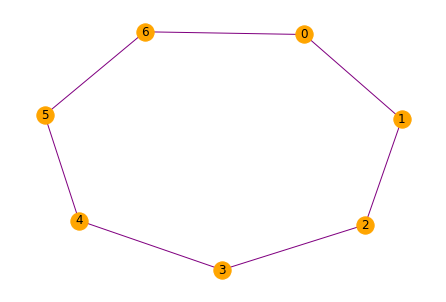

In [27]:
# exemplo de código para grafo
# notebook do ano passado

# Cria um objeto de grafo vazio
fafo = nx.Graph()

# cria nós
fafo.add_nodes_from([0, 1, 2, 3, 4, 5, 6])

# Adiciona algumas arestas ao grafo
fafo.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 0)])

# Plota o grafo
nx.draw(fafo, with_labels=True, node_color='orange', edge_color='purple')

# Exibe o gráfico
plt.show()

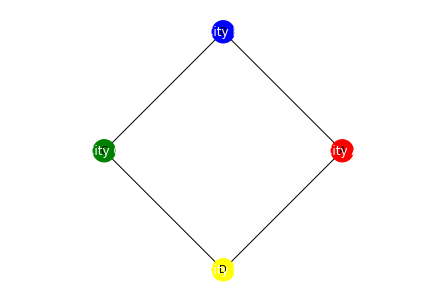

In [11]:
# sugestão para criar grafo com dicionário

# Dicionário com os dados dos nós
node_data = {
    'A': {'name': 'City A', 'color': 'red'},
    'B': {'name': 'City B', 'color': 'blue'},
    'C': {'name': 'City C', 'color': 'green'},
    'D': {'name': 'City D', 'color': 'yellow'},
}

# Cria um objeto de grafo vazio
G = nx.Graph()

# Adiciona os nós ao grafo com seus respectivos atributos
for node, data in node_data.items():
    G.add_node(node, **data)

# Adiciona algumas arestas ao grafo
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')])

# Obtém os atributos dos nós para personalização
node_labels = nx.get_node_attributes(G, 'name')
node_colors = [data['color'] for _, data in G.nodes(data=True)]

# Plota o grafo com os atributos dos nós
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='white')

# Exibe o gráfico
plt.axis('equal')
plt.show()

In [12]:
pos = nx.circular_layout(caminho_caixeiro)
node_labels = nx.get_node_attributes(caminho_caixeiro, 'name')
node_colors = [data['color'] for _, data in caminho_caixeiro.nodes(data=True)]
nx.draw(caminho_caixeiro, with_labels = True)  

KeyError: 'color'